In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
y = boston.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
X_train_scaled.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [13]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


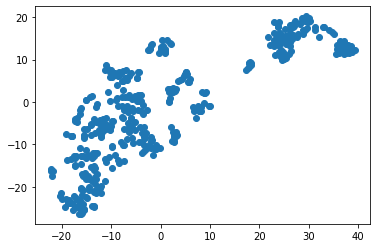

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [16]:
labels_train = model.fit_predict(X_train_scaled)

In [17]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

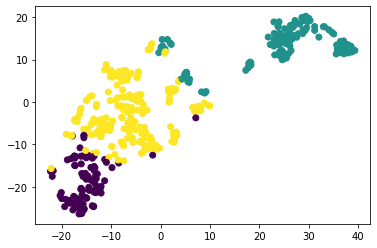

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [19]:
labels_test = model.predict(X_test_scaled)

In [20]:
y_train

array([12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,  8.7, 27.5, 20.7,
       36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6, 24.4,  8.8, 19.2,
       25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6, 14.5, 18.7, 17.8,
       16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4, 19.3,  8.5, 20.6,
       17. , 17.1, 14.5, 50. , 14.3, 12.6, 28.7, 21.2, 19.3, 23.1, 19.1,
       25. , 33.4,  5. , 29.6, 18.7, 21.7, 23.1, 22.8, 21. , 48.8, 14.6,
       16.6, 27.1, 20.1, 19.8, 21. , 41.3, 23.2, 20.4, 18.5, 29.4, 36.4,
       24.4, 11.8, 13.8, 12.3, 17.8, 33.1, 26.7, 13.4, 14.4, 50. , 22. ,
       19.9, 23.8, 17.5, 12.7,  5.6, 31.1, 26.2, 19.4, 16.7, 13.8, 22.9,
       15.3, 27.5, 36.1, 22.9, 24.5, 25. , 50. , 34.9, 31.7, 24.1, 22.1,
       14.1, 42.8, 19.3, 32.2, 26.4, 21.8, 21.7,  8.3, 46.7, 43.1, 31.5,
       10.5, 16.7, 20. , 33.3, 17.8, 50. , 20.5, 23.2, 13.1, 19.6, 22.8,
       28.7, 30.7, 22.9, 21.9, 23.9, 32.7, 24.3, 21.5, 24.6,  8.5, 26.4,
       23.1, 15. ,  8.8, 19.3, 23.9, 24.7, 19.8, 23

In [21]:
y_train.mean()

22.796534653465343

In [22]:
# Средние значения цены по кластерам

In [23]:
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

27.78837209302326
16.165354330708663
24.958115183246072


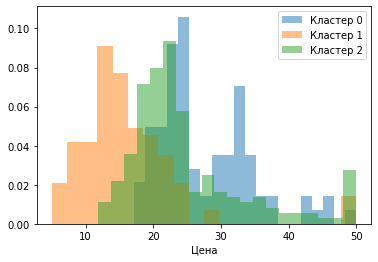

In [24]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [25]:
# Средние значения KRIM по кластерам

In [26]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [28]:
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.9155161972050828

In [29]:
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.5231626898031092

In [30]:
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(y_test[labels_test == 2], y_test_pred_2)

0.7215240423132004

In [41]:
claster_1 = y_test[labels_test == 0]

In [42]:
claster_2 = y_test[labels_test == 1]

In [57]:
claster_3 = y_test[labels_test == 2]
print(claster_1.shape,'\n',claster_2.shape,'\n', claster_3.shape)

(16,) 
 (35,) 
 (51,)


In [73]:
tmp = np.hstack([claster_1, claster_2])
y_test_all = np.hstack([tmp, claster_3])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])
y_test_pred_all = np.hstack([y_test_pred_all, y_test_pred_2])
r2_score(y_test_all, y_test_pred_all)

0.7955171399527768